In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install pycaret

     |████████████████████████████████| 264 kB 4.0 MB/s 
     |████████████████████████████████| 167 kB 37.4 MB/s 
     |████████████████████████████████| 271 kB 45.3 MB/s 
     |████████████████████████████████| 248 kB 33.8 MB/s 
     |████████████████████████████████| 14.6 MB 113 kB/s 
     |████████████████████████████████| 56 kB 3.4 MB/s 
     |████████████████████████████████| 1.7 MB 47.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 53.1 MB/s 
     |████████████████████████████████| 1.3 MB 75.2 MB/s 
     |████████████████████████████████| 111 kB 45.4 MB/s 
     |████████████████████████████████| 6.8 MB 42.0 MB/s 
     |████████████████████████████████| 80 kB 8.4 MB/s 
     |████████████████████████████████| 675 kB 63.3 MB/s 
     |████████████████████████████████| 10.1 MB 46.5 MB/s 
     |█████████████████

In [3]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from pycaret.classification import *

In [4]:
train = pd.read_csv('/content/gdrive/My Drive/train.csv')
test = pd.read_csv("/content/gdrive/My Drive/test_x.csv")

In [5]:
train

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,1.0,267,1.0,315,1.0,483,1.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,1.0,299,2.0,1915,4.0,439,2.0,823,1.0,309,5.0,586,4.0,2252,10s,2,1,1,Female,3,1,White,Jewish,1,2,6,1,2,6,3,0,6,4,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,2.0,560,2.0,640,1.0,1415,2.0,4494,5.0,1392,2.0,2478,5.0,1268,3.0,843,2.0,1401,4.0,1524,4.0,719,2.0,754,3.0,1118,4.0,654,4.0,1197,30s,2,1,2,Male,1,1,White,Atheist,2,2,2,3,1,3,3,4,1,5,1,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,4.0,1253,5.0,1094,1.0,1283,5.0,2209,1.0,1764,5.0,1062,5.0,1489,1.0,1908,4.0,891,1.0,1298,1.0,1200,5.0,473,5.0,1779,3.0,1355,1.0,667,10s,2,1,1,Female,1,1,White,Christian_Other,4,4,2,4,0,1,0,2,1,6,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,1328,1.0,599,1.0,650,1.0,1429,5.0,1748,1.0,770,5.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,4.0,1301,4.0,1680,4.0,737,1.0,1124,40s,4,1,2,Male,3,1,White,Atheist,1,2,0,4,0,1,3,2,2,4,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1


In [6]:
test

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,4.0,3171,5.0,3613,2.0,1494,4.0,1597,2.0,8891,5.0,2416,3.0,2043,3.0,3445,5.0,1232,3.0,1152,4.0,1447,3.0,798,4.0,1054,1.0,3462,2.0,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,1.0,605,2.0,601,1.0,2370,5.0,2268,3.0,1759,5.0,771,5.0,1124,3.0,4525,1.0,559,2.0,988,3.0,1014,4.0,380,5.0,995,3.0,629,4.0,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,2.0,767,1.0,799,1.0,1309,2.0,3317,4.0,766,4.0,1940,5.0,926,4.0,568,2.0,608,5.0,669,3.0,2417,3.0,710,4.0,2781,3.0,1110,5.0,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,1.0,578,1.0,742,1.0,2886,1.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,1.0,412,2.0,1076,4.0,1445,5.0,1069,1.0,847,4.0,1126,1.0,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,2.0,413,5.0,361,1.0,995,2.0,1427,3.0,1093,5.0,1201,4.0,1264,2.0,943,4.0,475,2.0,787,4.0,607,3.0,529,4.0,947,4.0,524,3.0,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,2.0,438,4.0,378,1.0,1616,3.0,1448,4.0,1886,4.0,852,5.0,872,2.0,526,3.0,381,4.0,818,2.0,736,4.0,828,2.0,1053,2.0,537,4.0,595,20s,3,2,3,Female,1,1,Other,Christian_Catholic,1,0,0,3,0,4,1,0,4,5,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,1.0,414,1.0,637,1.0,1650,1.0,799,5.0,1220,1.0,548,5.0,630,5.0,366,1.0,287,4.0,543,5.0,505,3.0,554,1.0,600,5.0,307,4.0,722,10s,2,2,1,Female,1,1,Asian,Agnostic,2,0,2,0,0,6,0,0,6,4,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,2.0,370,2.0,430,4.0,1630,4.0,863,2.0,1452,4.0,712,4.0,1373,2.0,580,2.0,537,2.0,653,2.0,623,2.0,648,2.0,713,4.0,347,2.0,1171,30s,4,1,4,Male,1,2,White,Atheist,4,2,1,6,1,2,1,6,0,5,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,1185,1.0,525,4.0,1463,1.0,1483,1.0,1113,2.0,883,3.0,2172,5.0,683,1.0,2615,1.0,872,3.0,8006,1.0,878,4.0,515,2.0,4406,4.0,471,2.0,1870,40s,2,1,3,Female,1,2,White,Atheist,4,6,1,6,0,2,1,6,1,5,2,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0


In [7]:
setup_clf = setup(data=train,target="voted")

,Description,Value
0,session_id,5201
1,Target,voted
2,Target Type,Binary
3,Label Encoded,"1: 0, 2: 1"
4,Original Data,"(45532, 78)"
5,Missing Values,False
6,Numeric Features,42
7,Categorical Features,35
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6964,0.7656,0.6409,0.7623,0.6962,0.3974,0.4035,23.698
lightgbm,Light Gradient Boosting Machine,0.6963,0.7656,0.6431,0.7607,0.6968,0.3967,0.4025,1.449
lda,Linear Discriminant Analysis,0.6935,0.7619,0.6588,0.7472,0.7001,0.3893,0.3926,1.596
ridge,Ridge Classifier,0.6933,0.0000,0.6587,0.7468,0.6999,0.3887,0.3921,0.123
et,Extra Trees Classifier,0.6928,0.7596,0.6398,0.7571,0.6933,0.3900,0.3957,9.585
ada,Ada Boost Classifier,0.6910,0.7582,0.6504,0.7479,0.6956,0.3850,0.3890,4.655
rf,Random Forest Classifier,0.6888,0.7570,0.6341,0.7538,0.6886,0.3822,0.3880,10.033
dt,Decision Tree Classifier,0.6108,0.6080,0.6408,0.6419,0.6413,0.2160,0.2161,1.693
lr,Logistic Regression,0.5417,0.5617,0.9876,0.5429,0.7006,-0.0005,-0.0023,3.968
qda,Quadratic Discriminant Analysis,0.5344,0.5000,0.9000,0.4887,0.6335,0.0001,0.0019,0.901


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5201, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [10]:
top5 = compare_models(sort="Accuracy",n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6964,0.7656,0.6409,0.7623,0.6962,0.3974,0.4035,22.668
lightgbm,Light Gradient Boosting Machine,0.6963,0.7656,0.6431,0.7607,0.6968,0.3967,0.4025,1.398
lda,Linear Discriminant Analysis,0.6935,0.7619,0.6588,0.7472,0.7001,0.3893,0.3926,1.520
ridge,Ridge Classifier,0.6933,0.0000,0.6587,0.7468,0.6999,0.3887,0.3921,0.120
et,Extra Trees Classifier,0.6928,0.7596,0.6398,0.7571,0.6933,0.3900,0.3957,9.305
ada,Ada Boost Classifier,0.6910,0.7582,0.6504,0.7479,0.6956,0.3850,0.3890,4.537
rf,Random Forest Classifier,0.6888,0.7570,0.6341,0.7538,0.6886,0.3822,0.3880,9.722
dt,Decision Tree Classifier,0.6108,0.6080,0.6408,0.6419,0.6413,0.2160,0.2161,1.677
lr,Logistic Regression,0.5417,0.5617,0.9876,0.5429,0.7006,-0.0005,-0.0023,3.977
qda,Quadratic Discriminant Analysis,0.5344,0.5000,0.9000,0.4887,0.6335,0.0001,0.0019,0.810


In [16]:
ridge = create_model("ridge",fold=10)##fold는 교차검증을 위한 수

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6951,0.0,0.6655,0.7456,0.7033,0.3918,0.3945
1,0.7020,0.0,0.6846,0.7458,0.7139,0.4042,0.4058
2,0.6859,0.0,0.6626,0.7334,0.6962,0.3728,0.3749
3,0.6972,0.0,0.6366,0.7663,0.6955,0.3995,0.4063
4,0.6953,0.0,0.6522,0.7537,0.6993,0.3938,0.3980
5,0.6812,0.0,0.6615,0.7270,0.6927,0.3630,0.3648
6,0.6950,0.0,0.6601,0.7484,0.7015,0.3922,0.3955
7,0.7057,0.0,0.6671,0.7612,0.7110,0.4138,0.4176
8,0.6872,0.0,0.6532,0.7400,0.6939,0.3766,0.3796
9,0.6881,0.0,0.6439,0.7466,0.6915,0.3796,0.3839


In [17]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6948,0.0,0.6649,0.7455,0.7029,0.3912,0.3939
1,0.7026,0.0,0.6857,0.7461,0.7146,0.4054,0.4069
2,0.6865,0.0,0.6626,0.7343,0.6966,0.3741,0.3763
3,0.6975,0.0,0.6378,0.7661,0.6961,0.4000,0.4067
4,0.6963,0.0,0.6528,0.7548,0.7001,0.3957,0.4000
5,0.6809,0.0,0.6609,0.7268,0.6923,0.3625,0.3642
6,0.6950,0.0,0.6601,0.7484,0.7015,0.3922,0.3955
7,0.7063,0.0,0.6676,0.7619,0.7116,0.4151,0.4188
8,0.6878,0.0,0.6538,0.7407,0.6945,0.3778,0.3809
9,0.6884,0.0,0.6439,0.7471,0.6917,0.3803,0.3846


In [18]:
adaboost = create_model("ada")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6986,0.7665,0.6632,0.7523,0.7049,0.3993,0.4026
1,0.7014,0.7654,0.6742,0.7505,0.7103,0.4040,0.4065
2,0.6837,0.7579,0.6505,0.7364,0.6908,0.3696,0.3726
3,0.6925,0.7619,0.6297,0.7628,0.6899,0.3904,0.3975
4,0.6878,0.7485,0.6430,0.7470,0.6911,0.3791,0.3834
5,0.6875,0.7503,0.6620,0.7360,0.6971,0.3762,0.3784
6,0.6938,0.7614,0.6503,0.7520,0.6975,0.3907,0.3949
7,0.7007,0.7730,0.6566,0.7594,0.7043,0.4044,0.4088
8,0.6781,0.7444,0.6387,0.7337,0.6829,0.3591,0.3627
9,0.6865,0.7529,0.6358,0.7488,0.6877,0.3772,0.3823


In [22]:
tuend_adaboost = tune_model(adaboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7014,0.7684,0.6511,0.7641,0.7031,0.4066,0.4118
1,0.7067,0.7672,0.6603,0.7671,0.7097,0.4167,0.4215
2,0.6825,0.7575,0.6355,0.7427,0.6849,0.3688,0.3733
3,0.6881,0.7648,0.6095,0.7684,0.6798,0.3836,0.3934
4,0.6909,0.7521,0.6308,0.7594,0.6892,0.3870,0.3936
5,0.6859,0.7503,0.6441,0.7433,0.6902,0.3750,0.3789
6,0.6928,0.7580,0.6353,0.7595,0.6918,0.3904,0.3966
7,0.7032,0.7804,0.6486,0.7685,0.7034,0.4106,0.4165
8,0.6799,0.7452,0.6249,0.7445,0.6794,0.3647,0.3703
9,0.6821,0.7533,0.6162,0.7534,0.6779,0.3703,0.3776


In [23]:
predict_model(adaboost,test)

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Label,Score
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,4.0,3171,5.0,3613,2.0,1494,4.0,1597,2.0,8891,5.0,2416,3.0,2043,3.0,3445,5.0,1232,3.0,1152,4.0,1447,3.0,798,4.0,1054,1.0,3462,2.0,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,2,0.5052
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,1.0,605,2.0,601,1.0,2370,5.0,2268,3.0,1759,5.0,771,5.0,1124,3.0,4525,1.0,559,2.0,988,3.0,1014,4.0,380,5.0,995,3.0,629,4.0,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.5093
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,2.0,767,1.0,799,1.0,1309,2.0,3317,4.0,766,4.0,1940,5.0,926,4.0,568,2.0,608,5.0,669,3.0,2417,3.0,710,4.0,2781,3.0,1110,5.0,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,1,0.5015
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,1.0,578,1.0,742,1.0,2886,1.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,1.0,412,2.0,1076,4.0,1445,5.0,1069,1.0,847,4.0,1126,1.0,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.5089
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,2.0,413,5.0,361,1.0,995,2.0,1427,3.0,1093,5.0,1201,4.0,1264,2.0,943,4.0,475,2.0,787,4.0,607,3.0,529,4.0,947,4.0,524,3.0,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,2,0.5062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,2.0,438,4.0,378,1.0,1616,3.0,1448,4.0,1886,4.0,852,5.0,872,2.0,526,3.0,381,4.0,818,2.0,736,4.0,828,2.0,1053,2.0,537,4.0,595,20s,3,2,3,Female,1,1,Other,Christian_Catholic,1,0,0,3,0,4,1,0,4,5,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,1,0.5020
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,1.0,414,1.0,637,1.0,1650,1.0,799,5.0,1220,1.0,548,5.0,630,5.0,366,1.0,287,4.0,543,5.0,505,3.0,554,1.0,600,5.0,307,4.0,722,10s,2,2,1,Female,1,1,Asian,Agnostic,2,0,2,0,0,6,0,0,6,4,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,0.5086
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,2.0,370,2.0,430,4.0,1630,4.0,863,2.0,1452,4.0,712,4.0,1373,2.0,580,2.0,537,2.0,653,2.0,623,2.0,648,2.0,713,4.0,347,2.0,1171,30s,4,1,4,Male,1,2,White,Atheist,4,2,1,6,1,2,1,6,0,5,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0.5056
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,1185,1.0,525,4.0,1463,1.0,1483,1.0,1113,2.0,883,3.0,2172,5.0,683,1.0,2615,1.0,872,3.0,8006,1.0,878,4.0,515,2.0,4406,4.0,471,2.0,1870,40s,2,1,3,Female,1,2,White,Atheist,4,6,1,6,0,2,1,6,1,5,2,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1,0.5037


In [24]:
predict_model(tuend_adaboost,test)

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Label,Score
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,4.0,3171,5.0,3613,2.0,1494,4.0,1597,2.0,8891,5.0,2416,3.0,2043,3.0,3445,5.0,1232,3.0,1152,4.0,1447,3.0,798,4.0,1054,1.0,3462,2.0,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,2,0.5080
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,1.0,605,2.0,601,1.0,2370,5.0,2268,3.0,1759,5.0,771,5.0,1124,3.0,4525,1.0,559,2.0,988,3.0,1014,4.0,380,5.0,995,3.0,629,4.0,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.5126
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,2.0,767,1.0,799,1.0,1309,2.0,3317,4.0,766,4.0,1940,5.0,926,4.0,568,2.0,608,5.0,669,3.0,2417,3.0,710,4.0,2781,3.0,1110,5.0,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,1,0.5026
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,1.0,578,1.0,742,1.0,2886,1.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,1.0,412,2.0,1076,4.0,1445,5.0,1069,1.0,847,4.0,1126,1.0,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.5118
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,2.0,413,5.0,361,1.0,995,2.0,1427,3.0,1093,5.0,1201,4.0,1264,2.0,943,4.0,475,2.0,787,4.0,607,3.0,529,4.0,947,4.0,524,3.0,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,2,0.5092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,2.0,438,4.0,378,1.0,1616,3.0,1448,4.0,1886,4.0,852,5.0,872,2.0,526,3.0,381,4.0,818,2.0,736,4.0,828,2.0,1053,2.0,537,4.0,595,20s,3,2,3,Female,1,1,Other,Christian_Catholic,1,0,0,3,0,4,1,0,4,5,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,1,0.5035
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,1.0,414,1.0,637,1.0,1650,1.0,799,5.0,1220,1.0,548,5.0,630,5.0,366,1.0,287,4.0,543,5.0,505,3.0,554,1.0,600,5.0,307,4.0,722,10s,2,2,1,Female,1,1,Asian,Agnostic,2,0,2,0,0,6,0,0,6,4,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,0.5142
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,2.0,370,2.0,430,4.0,1630,4.0,863,2.0,1452,4.0,712,4.0,1373,2.0,580,2.0,537,2.0,653,2.0,623,2.0,648,2.0,713,4.0,347,2.0,1171,30s,4,1,4,Male,1,2,White,Atheist,4,2,1,6,1,2,1,6,0,5,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0.5076
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,1185,1.0,525,4.0,1463,1.0,1483,1.0,1113,2.0,883,3.0,2172,5.0,683,1.0,2615,1.0,872,3.0,8006,1.0,878,4.0,515,2.0,4406,4.0,471,2.0,1870,40s,2,1,3,Female,1,2,White,Atheist,4,6,1,6,0,2,1,6,1,5,2,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1,0.5048


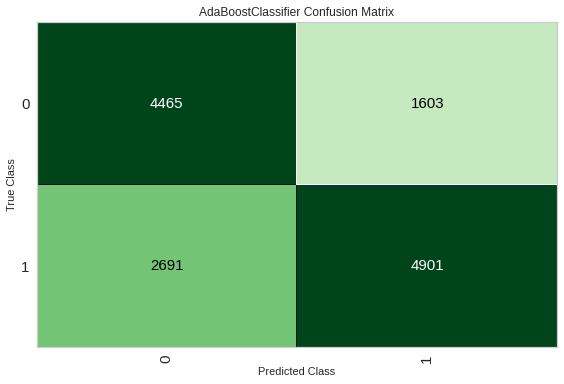

In [26]:
plot_model(estimator=adaboost,plot="confusion_matrix")

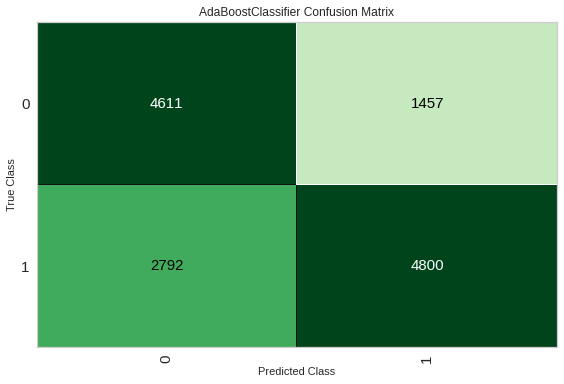

In [28]:
plot_model(estimator=tuend_adaboost,plot="confusion_matrix")